<a href="https://colab.research.google.com/github/AlessiaCampo/Machine_Learning_project/blob/main/MNIST_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MNIST DIGITS DATASET CLASSIFICATION: DEVELOPMENT OF DIFFERNTE MACHINE LEARNING CLASSIFIERS** 

*MACHINE LEARNING BASIC+ADVANCED PROJECT* 
\
*Master Degree in Bioinformatics at University of Bologna*
\
*Alessia Campo*

**INTRODUCTION**

The MNIST DIGITS dataset is composed of 60.000 28X28 grayscale images of 10 digits, along with a test set of 10.000 images. 

Many Machine Learning methods can be applied to this dataset to test learning techniques and pattern recognition methods. 

The aim of this project is to build and evaluate different ML models for the classification of the handwritten digit images in its correct and real value. 

**MAIN GOAL :**

The objective of this work is to apply a set of machine learning models for the prediction of digits from handwritten images. We will apply different ML models, comparing the accurancy of the prediction and the computational efficiency of each one. 
Before starting with the implementation of the models, we will inspect the structure and the main features of the MNIST digit dataset.


**METHODS :** 

In this project, we will use different tools and packages for the development of ML models  as **sklearn** for the implementation of Decision Trees and Random Forests, as well as for computing performance metrics and applying different evaluation methods (ie cross-validation). We will exploit the **Keras API of the TensorFlow open source platform** for the implementation of CNNs model. 

Graphic packages as **Matplotlib** and **Seaborn** will be used for data visualization and analysis. 


In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 1.83 ms (started: 2021-09-11 16:12:31 +00:00)


In [2]:
# install keras API
!pip install keras

time: 2.94 s (started: 2021-09-11 16:12:31 +00:00)


In [3]:
# import required packages and modules
from matplotlib import pyplot
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras import optimizers
from tensorflow.keras.optimizers import Adam 
from keras.utils.vis_utils import plot_model


time: 2.94 s (started: 2021-09-11 16:12:34 +00:00)


In [4]:
# load the MNIST digit dataset through Keras
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data() # define the training and testing sets 

11501568/11490434 [==============================] - 0s 0us/step
time: 704 ms (started: 2021-09-11 16:12:37 +00:00)


**MNIST DIGIT DATASET : SHAPE** 

The dataset is divided into **training** (60k images) and **testing** (10k images) set, each one composed of an input vector (X) containing the 28x28 pixel images and an output vector (Y) containing the assigned class (digit).

We can easily visualize the shape of each vector as below: 

In [5]:
# print the shape of the training and testing vectors 
a = u'\u2192'
print(f'Training image pixels vector (X_train) shape {a} {str(x_train.shape)} \n')
print(f'Training class digit vector (Y_train)  shape {a}   {str(y_train.shape)} \n')
print(f'Testing image pixel vector (X_test) shape {a} {str(x_test.shape)} \n')
print(f'Testing class digit vector (Y_test) shape {a}  {str(y_test.shape)} \n')
print(f'Single Image matrix shape: \n {str(x_train[0].shape)} \n')

Training image pixels vector (X_train) shape → (60000, 28, 28) 

Training class digit vector (Y_train)  shape →   (60000,) 

Testing image pixel vector (X_test) shape → (10000, 28, 28) 

Testing class digit vector (Y_test) shape →  (10000,) 

Single Image matrix shape: 
 (28, 28) 

time: 3.98 ms (started: 2021-09-11 16:12:37 +00:00)


**MNIST DIGIT DATASET : DATA DISPLAY**




1. TRAINING SET EXAMPLE IMAGE 

We can display digits using matplotlib's subplots utility wrapper.

Here we display only the first 10 digits images and the corresponding classes  as example:



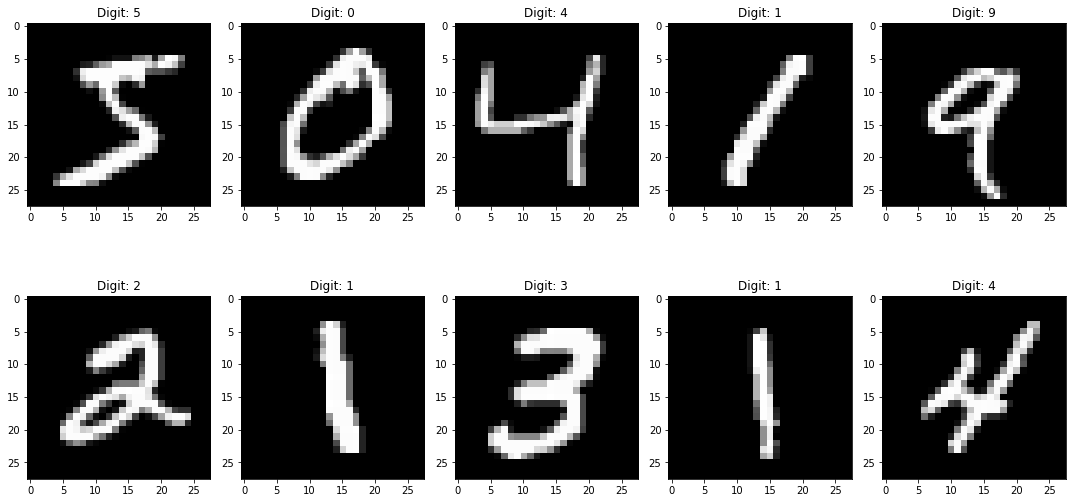

time: 1.99 s (started: 2021-09-11 16:12:37 +00:00)


In [6]:
# define two arrays for the first 10 images and labels (class)
images=x_train[:10]
labels=y_train[:10]

# initialize the figure and the axes 
fig,axes=plt.subplots(2,5, 
                      figsize=(1.5*10, 2*4))
# iteratively display the data
for i in range(10):
  ax=axes[i//5, i%5]
  ax.imshow(images[i],
            cmap='gray')
  ax.set_title(f'Digit: {labels[i]}')
plt.grid(False)
plt.tight_layout()
plt.show()


2. DIGIT PIXELS COUNTS DISPLAY

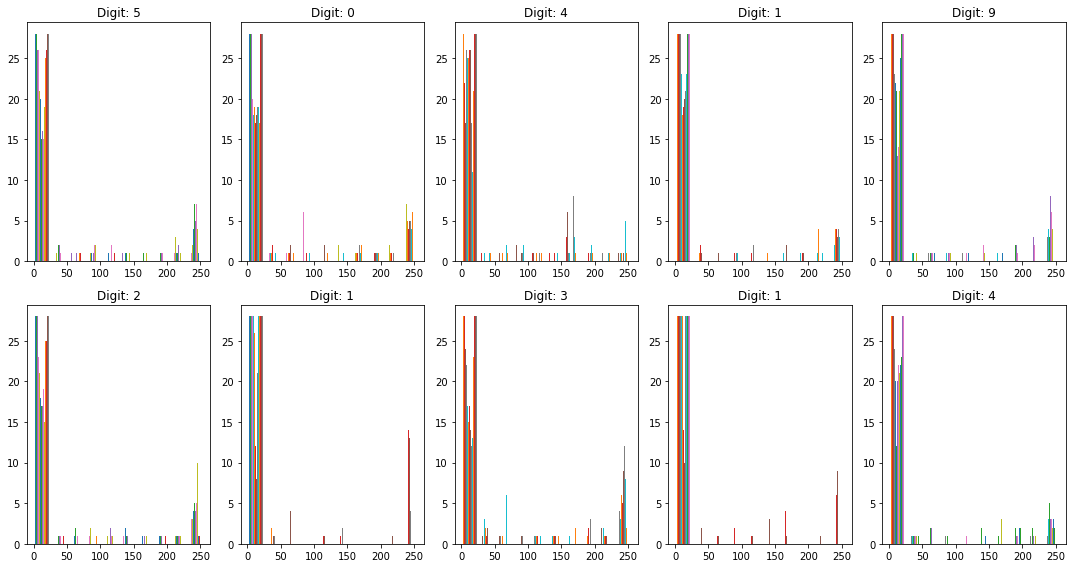

time: 8.13 s (started: 2021-09-11 16:12:39 +00:00)


In [7]:
# plot the pixels counts for each digit to visualize the range of pixel values
fig,axes=plt.subplots(2,5,
                      figsize=(1.5*10, 2*4))
for i in range(10):
  ax=axes[i//5, i%5]
  ax.hist(images[i])
  ax.set_title(f'Digit: {labels[i]}')
plt.grid(False)
fig.tight_layout()
plt.show()

As expected the pixel values range from 0 to 255: the majority close to 0 represents the empty pixel subcells; values different from 0 or close to 255 represent the pixel values that compose the digit images.  

**MNIST DIGIT DATASET : DATA DISTRIBUTION**






1. VISUALIZE THE CLASS AMOUNTS ACROSS THE TRAINING  AND TESTING SET

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


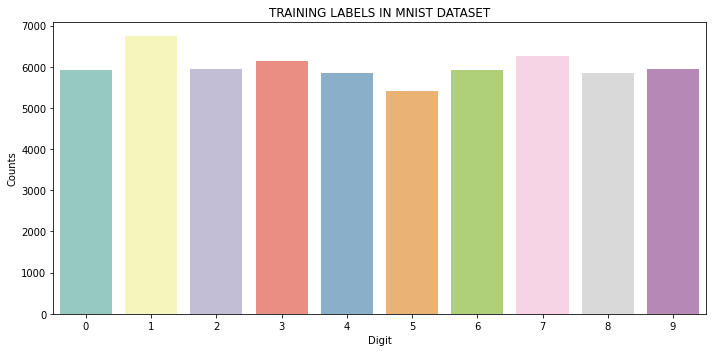

time: 357 ms (started: 2021-09-11 16:12:48 +00:00)


In [8]:
plt.figure(figsize=(10,5))
plot=sns.countplot(y_train,
                   palette="Set3")
plt.xlabel('Digit')
plt.ylabel('Counts')
plt.title('TRAINING LABELS IN MNIST DATASET')
plt.grid(False)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


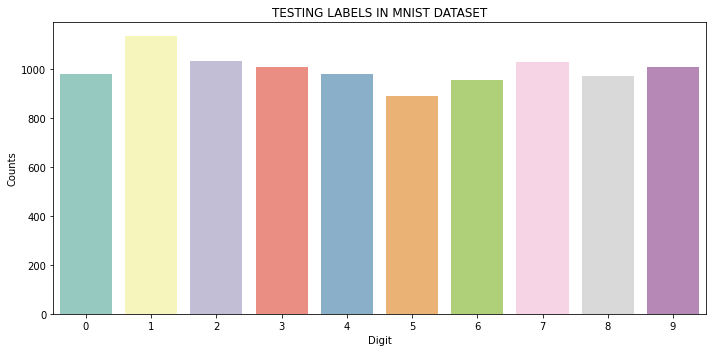

time: 330 ms (started: 2021-09-11 16:12:48 +00:00)


In [9]:
plt.figure(figsize=(10,5))
plot=sns.countplot(y_test, 
                   palette="Set3")
plt.xlabel('Digit')
plt.ylabel('Counts')
plt.title('TESTING LABELS IN MNIST DATASET')
plt.grid(False)
plt.tight_layout()

From the plot above, we can observe that the digit classes are uniformally distributed across the training and testing sets

**DATA RESHAPING :** 

The current shape of data consists of a matrix for each sample, each of size 28x28. 

In order to get a data shape that can make the training easier and effectively readble from the models, we can reshape our data and flatten the 28x28 matrix into a single vector of 784 elements for each sample. 


In [10]:
# reshape training and testing data
feat_train=x_train.flatten().reshape(60000,784)
print(f'Reshaped training data: \n {feat_train} \n')
print(f'Shape:  {feat_train.shape} \n')

feat_test=x_test.flatten().reshape(10000,784)
print(f'Reshaped testing data: \n {feat_test} \n')
print(f'Shape: {feat_test.shape}')


Reshaped training data: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape:  (60000, 784) 

Reshaped testing data: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

Shape: (10000, 784)
time: 30.3 ms (started: 2021-09-11 16:12:48 +00:00)





**1. DECISION TREE** 

1. It is one of the most used and powerful supervised machine learning algorithms for both **regression** and **classification** tasks. 

2. Decision Trees (DTs) are simple to use and interpret. 
3. They no need particular data preprocessing steps (ie one-hot encoding) and they are very fast and efficients. 

3. Some disadvantages are that DTs model can generally lead to overfitting (not proper generalization of data)  

4. Sometimes it is better to use a balanced dataset and avoid a biased learning if a class dominates 

The **main goal** is to create a DT model that can be used to predict the class of the target variable by learning simple decision rules inferred during the training phase. 

To predict a class for a specific data point, we start from the root node of the tree. Based on a comparison between the root attribute and the data point attribute we can follow the correct branch and go down jumping to the next node. Each leaf node represents the final class label to be assigned.

We apply the **gini index as impurity measure** (probability of a particular variable to be wrongly classified) 
We can select a **maximum depth value** of the tree  (a measure of how many splits a tree can makes before coming out with a prediction). Usually too high depth values could lead to overfitting.








TUNE THE DEPTH OF THE TREE 

Before starting to build and train our DT classifier we can tune the depth of the tree so as to find a good value for the set up of our model 
 

In [11]:
# choose a range of depth values to be assessed 
max_depth_range= list(range(1,11)) 

# assess the accuracy value by changing the depth of the tree
accuracy=[]
for depth in max_depth_range:
  dt_model=DecisionTreeClassifier(max_depth=depth,
                                  random_state=0)
  dt_model.fit(feat_train,
               y_train)
  score=dt_model.score(feat_test,
                       y_test)
  accuracy.append(score)
print(f'Accuracy values: {accuracy}')

Accuracy values: [0.1994, 0.3447, 0.4953, 0.5957, 0.6747, 0.7416, 0.7853, 0.8186, 0.8501, 0.8657]
time: 49 s (started: 2021-09-11 16:12:48 +00:00)


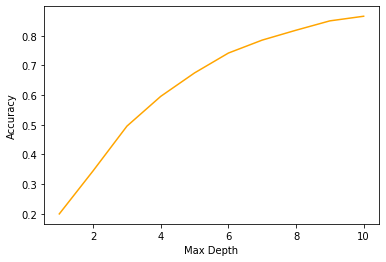

time: 186 ms (started: 2021-09-11 16:13:37 +00:00)


In [12]:
plt.plot(max_depth_range,accuracy, color='Orange')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.grid(False)

From the plot above we can see that the highest accuracy value is reached with a max_depth of 10 over a range of possibilities from 1 to 10. Trying with higher values the accuracy of the model seems to be pretty similar to the one obtained with Max_depth=10. We can keep the value of 10 to avoid the risk of overfitting that can occur when building too deep trees

**2.1 DECISION TREE WITH  MAX_DEPTH OF 10**


TRAINING AND PREDICTION STEPS 


In [13]:
# define the model 
DT=DecisionTreeClassifier(max_depth=10)
# fit the model on the training data
DT.fit(feat_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

time: 8.32 s (started: 2021-09-11 16:13:38 +00:00)


In [14]:
# prediction step on the testing data
pred_dt=DT.predict(feat_test)


time: 18.9 ms (started: 2021-09-11 16:13:46 +00:00)




EVALUATION OF METRICS AND PERFORMANCE



In [15]:
# report of the main performance scores
print("CLASSIFICATION REPORT:", "\n",classification_report(y_test,pred_dt))
print()
dt_acc=round(accuracy_score(y_test,pred_dt),3)
print("ACCURACY SCORE:", "\n", dt_acc)

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.84      0.85      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.85       982
           5       0.83      0.81      0.82       892
           6       0.92      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.82      0.81       974
           9       0.82      0.86      0.84      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000


ACCURACY SCORE: 
 0.867
time: 36.8 ms (started: 2021-09-11 16:13:46 +00:00)


[Text(60.0, 0.5, 'True Class'), Text(0.5, 33.0, 'Predicted Class')]

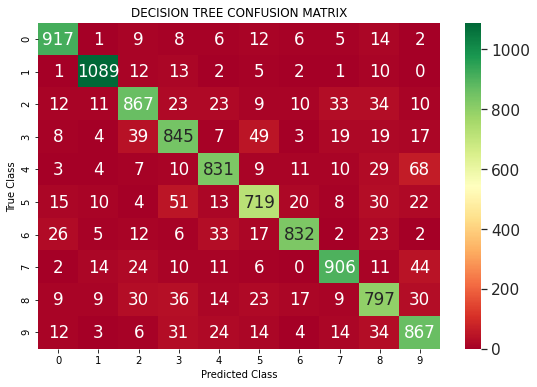

time: 1.05 s (started: 2021-09-11 16:13:46 +00:00)


In [16]:
# compute the confusion matrix
CM_DT=confusion_matrix(y_test,
                       pred_dt)

# plot the confusion matrix in the shape of a heatmap
color=sns.color_palette("RdYlGn",
                        as_cmap=True)

fig=plt.figure(figsize=(9,6))
plt.title('DECISION TREE CONFUSION MATRIX')
sns.set(font_scale=1.4)

ax=sns.heatmap(CM_DT,
               annot=True,
               cmap=color,
               fmt="d")

ax.set(ylabel='True Class',
       xlabel='Predicted Class')




**OBSERVATIONS:** 



- Decision Tree classifiers performs well with our dataset. 
- Overall the model has good ability of predicting correctly and catching positive instances (precision and recall) \
- As shown from the confusion matrix diagonal values, digits are mostly predicted correctly. Nevertheless misclassification occurs for some digits, such as '4' and '7' that have a higher rate of misclassification into '9'  or as '5' into '3' and viceversa. 
 

**2.2 DECISION TREE with *5*-fold cross validation** 

Another inspection can be the usage of the cross-validation technique. It is based on splitting the orginal dataset into multiple subsets and perform the model training/testing steps on these subsets. Here we use a 5-fold cross-validation which splits the data into *k*=5 folds. The model is then trained on *k-1*=4 subsets and evaluated on the remaining subset. The same procedure is repeated *k*=5 times with a different trainin/testing splitting so that - at the end - each subset has been retained as testing set once. 

In [17]:
# concatenate the train test sets in the orginal shape
feat=np.concatenate((feat_train,
                     feat_test))
labels=np.concatenate((y_train,
                       y_test))

print(f'Features shape: {feat.shape} \n')
print(f'Labels shape:  {labels.shape}')

Features shape: (70000, 784) 

Labels shape:  (70000,)
time: 18.7 ms (started: 2021-09-11 16:13:47 +00:00)


In [18]:
# perform the 5-fold cross-validation 
cv_score_dt=cross_val_score(DT,
                            feat,labels, 
                            cv=5,
                            scoring="accuracy")

cv_score_dt=[round(i,3) for i in cv_score_dt ]
print(f'Perfromance results from CV: \n {cv_score_dt}')

Perfromance results from CV: 
 [0.855, 0.853, 0.847, 0.856, 0.87]
time: 39.3 s (started: 2021-09-11 16:13:47 +00:00)


In [19]:
# compute the average of the accuracy values obtained at each cv iteration
cv_acc_dt=round(np.mean(cv_score_dt),3)
print(f'Average Accuracy score from CV: \n {cv_acc_dt}')

Average Accuracy score from CV: 
 0.856
time: 3.55 ms (started: 2021-09-11 16:14:26 +00:00)


**OBSERVATIONS:** 

The usage of 5-fold cross-validation on DT model shows a good performance, similar to the simple training applied in 2.1. This suggests that the model performs consistent predictions and it doesn't end up in overfitting 



**3. RANDOM FOREST** 
1. Random forest consists of a large number of individual decision trees operating as an **ensemble** to get a more accurate and stable prediction. 
2. The estimator randomly takes different sub-samples of the dataset and produces a number of decision trees. 
3. A **majority voting** is performed over the outcome of each estimators to get the final outcome. 
3. It is a feasible method to **control the over-fitting** (common in DT classifiers) and to improve the accuracy of the predictions by averaging the results. This means that the prediction of the ensemble is given as the averaged prediction of the individual classifiers. 

There are different hyperparametrs to take into account when building a Random forest model, as the number of estimators to be used. In general a higher number of trees increases the performance and makes the predictions more stable, even if the computation can be slower  





**3.1 Random Forest model made up of 100 estimators**

In [20]:
# training random forest model
rf_model=RandomForestClassifier(n_estimators=100)

rf_model.fit(feat_train,
             y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

time: 37 s (started: 2021-09-11 16:14:26 +00:00)


In [21]:
# prediction step on the testing data
pred_rf=rf_model.predict(feat_test)

# report of the main performance scores
print(f'Classification Report \n {classification_report(y_test,pred_rf)}')
rf_acc=round(accuracy_score(y_test,pred_rf),3)
print(f'ACCURACY SCORE: \n {rf_acc}')

Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.97      0.97      1010
           4       0.97      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

ACCURACY SCORE: 
 0.97
time: 372 ms (started: 2021-09-11 16:15:04 +00:00)


[Text(52.5, 0.5, 'True Class'), Text(0.5, 25.5, 'Predicted Class')]

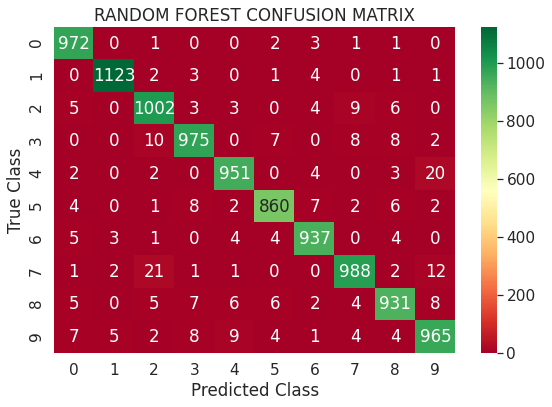

time: 903 ms (started: 2021-09-11 16:15:04 +00:00)


In [22]:
# compute the confusion matrix
CM_RF=confusion_matrix(y_test,pred_rf)

# plot the confusion matrix in the shape of a heatmap
color=sns.color_palette("RdYlGn",
                        as_cmap=True)

fig=plt.figure(figsize=(9,6))
plt.title('RANDOM FOREST CONFUSION MATRIX')
sns.set(font_scale=1.4)

ax=sns.heatmap(CM_RF,
               annot=True,
               cmap=color,
               fmt="d")

ax.set(ylabel='True Class',
       xlabel='Predicted Class')



**OBSERVATIONS:**

- From the above results it is clear that the accuracy is improved by using ensemble methods as Random Forest with respect to the usage of a single Decision Tree Classifier. 
- Precision, Recall and F-1 metrics are improved for each of the 10 classes w.r.t DT model
- What we can inspect is wether the accuracy increases even further using a larger number of estimators: let's try with 700

**3.2 Random Forest model made up of 700 estimators**

In [23]:
# create a new model with a greater number of estimators 
rf_model1=RandomForestClassifier(n_estimators=700)
# train the new model on training set
rf_model1.fit(feat_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

time: 4min 16s (started: 2021-09-11 16:15:05 +00:00)


In [24]:
# prediction step on the testing data
pred1=rf_model1.predict(feat_test)
print(f'Classification Report \n {classification_report(y_test,pred1)} ')
rf_acc1=round(accuracy_score(y_test,pred1),3)
print(f'ACCURACY SCORE: \n {rf_acc1}')


Classification Report 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000
 
ACCURACY SCORE: 
 0.971
time: 2.41 s (started: 2021-09-11 16:19:21 +00:00)


**OBSERVATIONS:**

Performance metrics result to be almost equal to the ones obtained with the first RF model 

**3.3 Random Forest model with *k*-fold cross validation** 

 We will perform a 5-fold cross-validation to further validate the potential of prediction of RF models keeping n_estimators=100

In [25]:
# perform the 5-fold cross-validation 
cv_score_rf=cross_val_score(rf_model,
                         feat,
                         labels,
                         cv=5, 
                         scoring="accuracy")
cv_score_rf=[round(i,3) for i in cv_score_rf ]
print(f'Perfromance results from CV: \n {cv_score_rf}')

Perfromance results from CV: 
 [0.968, 0.968, 0.966, 0.965, 0.971]
time: 2min 50s (started: 2021-09-11 16:19:24 +00:00)


In [26]:
# compute the average of the accuracy values obtained at each cv iteration
cv_acc_rf=round(np.mean(cv_score_rf),3)
print(cv_acc_rf)

0.968
time: 2.22 ms (started: 2021-09-11 16:22:14 +00:00)


**OBSERVATIONS:** 

So far we explored three different possibilities of building and training our RF model. The performance is quite high in each one, even when we use cross-validation methods.This highlights that there is no overfitting in our model prediction and that the esemble methods are highly reliable for classification tasks



**4. CONVOLUTIONAL NEURAL NETWORK**



Convolutional Neural Network (CNN) is a common machine learning application for visual imagery. 
CNNs are regularized versions of multilayer perceptrons meaning that they represent a good application to avoid overfitting.  




> MODEL ARCHITECTURE DEFINITION 

For CNN it is important to define the **number of layers**, the **transfer/activation function** used at each layer and other important parameters that can influence the performance of a CNN as the loss of function, the optimization algorithm, how many epoch and the batch size within each epoch need to be set up.

 
MAIN CNN COMPONENTS:
- The **convolutional front-end** applies a filter (window) to detect specific patterns in the input image by sliding on the image itself and multiplying the values of the filter by the values in the input image currently covered by the filter. As the filter moves over the image all the results are summed and the final result appears in the output matrix for that specific window. The filter slides and repeats the same process again.
- **Subsampling** aim is to reduce the input dimensions and avoid overfitting. One of the main technique of subsampling is to apply for example the max pooling layer that takes only the largest value from the current window of the filter that cover the input image.
- Another crucial aspect is the **flattening** step. It takes the output matrix of filter and pooling layers and convert it into a simple vector of 1D.
The simple vector is then passed to the output layer where it starts to learn and predict the class label.


As we build the models, different combinations of the parameters will be presented in the model architecture. 
 


 



Before starting with the implementation of our model we need to prepare our data so as to obtain a suitable shape to start

**DATA RESHAPE:** starting from the initial input array data dimensions, we can reshape them into 4-D array to obtain the required input for CNN 

**DATA RESCALING:** we need to transform the pixel values, originally in the range 0-255, into a smaller range of 0-1. This procedure ensure a faster application of the model. The rescaling procedure includes also the trasformation of the pixel values form unsigned integers (uint8) to floats (float32)  


In [27]:
# reshape data into 4-dimensions for Keras API usage 
xtrain=x_train.reshape((60000,28,28,1))    # (#of samples, pixel array dim1, pixel array dim2, canal)
xtest=x_test.reshape((10000,28,28,1))
print(f'Input training array shape for CNN: \n {xtrain.shape}')


# rescale data
xtrain=xtrain / 255
xtest= xtest / 255

Input training array shape for CNN: 
 (60000, 28, 28, 1)
time: 211 ms (started: 2021-09-11 16:22:14 +00:00)


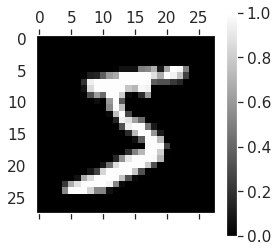

time: 220 ms (started: 2021-09-11 16:22:14 +00:00)


In [28]:
# verify that the normalization is correctly done 
plt.matshow(xtrain[0,:,:,0], 
            cmap="gray")
plt.grid(False)
plt.colorbar()
plt.show()


 
**ONE-HOT ENCODING:** the next step is to convert the class labels into one-hot encoding vector. This means converting categorical data into a row vector of dimension 1x10 for each image. The vector contains all zeros except for the class that it represents- for which it assumes the value of 1 (binary vector). 

In [29]:
from tensorflow.keras.utils import to_categorical 


print(f'BEFORE:  \n Shape {a} {y_train.shape} \n Digit representation {a} {y_train[0]} \n')


ytrain=tf.keras.utils.to_categorical(y_train)
ytest=tf.keras.utils.to_categorical(y_test)

d=u'\u2193'
print(f'AFTER: \n Shape {a} {ytrain.shape} \n Digit representation {d} \n {ytrain[0]}')



BEFORE:  
 Shape → (60000,) 
 Digit representation → 5 

AFTER: 
 Shape → (60000, 10) 
 Digit representation ↓ 
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
time: 12.1 ms (started: 2021-09-11 16:22:15 +00:00)




**4.1 CNN: MODEL 0** 


BUILDING THE MODEL 

Our first CNN model is made up of:
- **Two convolutional layers** with two different windows size and the ReLU activation function. In this step the input size is reduced to make the process faster and the ReLU function increases non-linearity in the CNN; 
- **One Pooling layer** enables to apply a 2x2 window on the feature map and returns a simplified pooled feature map
- **One flattening layer** to transofrm the feature map into a single column
- **One additional Dense/fully connected layer** that can process the data and in which the error is computed and then backpropagated through the system to improve the prediction. In the last dense/output layer is used a softmax activation function.

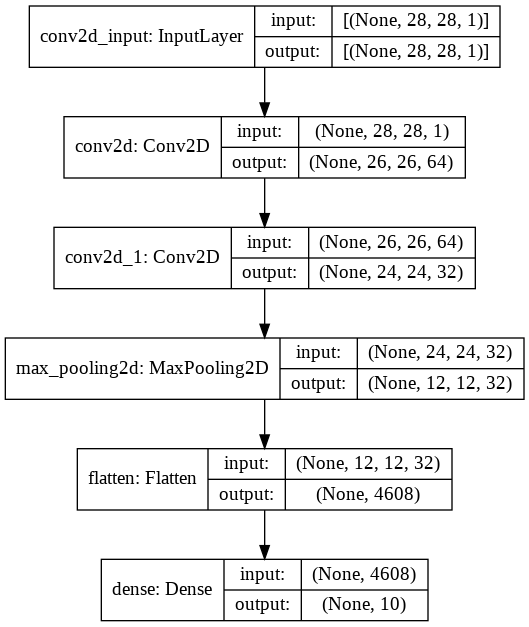

time: 5.85 s (started: 2021-09-11 16:22:15 +00:00)


In [30]:
# model building with Keras API
model=Sequential()
model.add(Conv2D(64,(3,3),activation="relu", input_shape=(28,28,1)))  
model.add(Conv2D(32,(3,3),activation="relu"))                         
model.add(MaxPool2D(2,2))                                             
model.add(Flatten())
model.add(Dense(10,activation="softmax"))
# model visualization
from keras.utils.vis_utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)



COMPILING THE MODEL 

Compiling the model takes 3 parameters: optimizer, loss and metrics of performance. 

- The optimizer is the gradient discent algorithm and controls the learning rate. Adam is generally a good optimizer and it adjusts the leraning rate throughout the training.
- The loss function will be the categorical cross entropy where lower score means a better performance
- The metrics will be the accuracy

In [31]:
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

time: 20.3 ms (started: 2021-09-11 16:22:20 +00:00)






> TRAINING THE MODEL \
We will use the fit() function to train the model on the training set. Specifying the number of epochs helps us to define how many times the entire dataset is passed forward and backward through the CNN. The dataset is divided in smaller batches defined by the number of batches.   

In [32]:
history=model.fit(xtrain,
                  ytrain,
                  validation_data=(xtest,ytest),
                  epochs=25,
                  batch_size=256)



Epoch 1/25
235/235 [==============================] - 33s 24ms/step - loss: 0.3201 - accuracy: 0.9098 - val_loss: 0.0875 - val_accuracy: 0.9746
Epoch 2/25
235/235 [==============================] - 5s 22ms/step - loss: 0.0787 - accuracy: 0.9769 - val_loss: 0.0623 - val_accuracy: 0.9818
Epoch 3/25
235/235 [==============================] - 5s 22ms/step - loss: 0.0570 - accuracy: 0.9830 - val_loss: 0.0483 - val_accuracy: 0.9851
Epoch 4/25
235/235 [==============================] - 5s 22ms/step - loss: 0.0452 - accuracy: 0.9868 - val_loss: 0.0455 - val_accuracy: 0.9851
Epoch 5/25
235/235 [==============================] - 5s 22ms/step - loss: 0.0378 - accuracy: 0.9889 - val_loss: 0.0415 - val_accuracy: 0.9874
Epoch 6/25
235/235 [==============================] - 5s 22ms/step - loss: 0.0314 - accuracy: 0.9909 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 7/25
235/235 [==============================] - 5s 22ms/step - loss: 0.0281 - accuracy: 0.9911 - val_loss: 0.0387 - val_accuracy: 0.988



EVALUATION OF METRICS AND PERFORMANCE



In [33]:
# performance on the validation set
score=model.evaluate(xtest,ytest)
cnn0_acc=round(score[1],3)
cnn0_loss=round(score[0])
print(f'Test loss:  {cnn0_loss}')
print(f'Test accuracy: {cnn0_acc}')



313/313 [==============================] - 1s 4ms/step - loss: 0.0691 - accuracy: 0.9880
Test loss:  0
Test accuracy: 0.988
time: 2.64 s (started: 2021-09-11 16:25:43 +00:00)


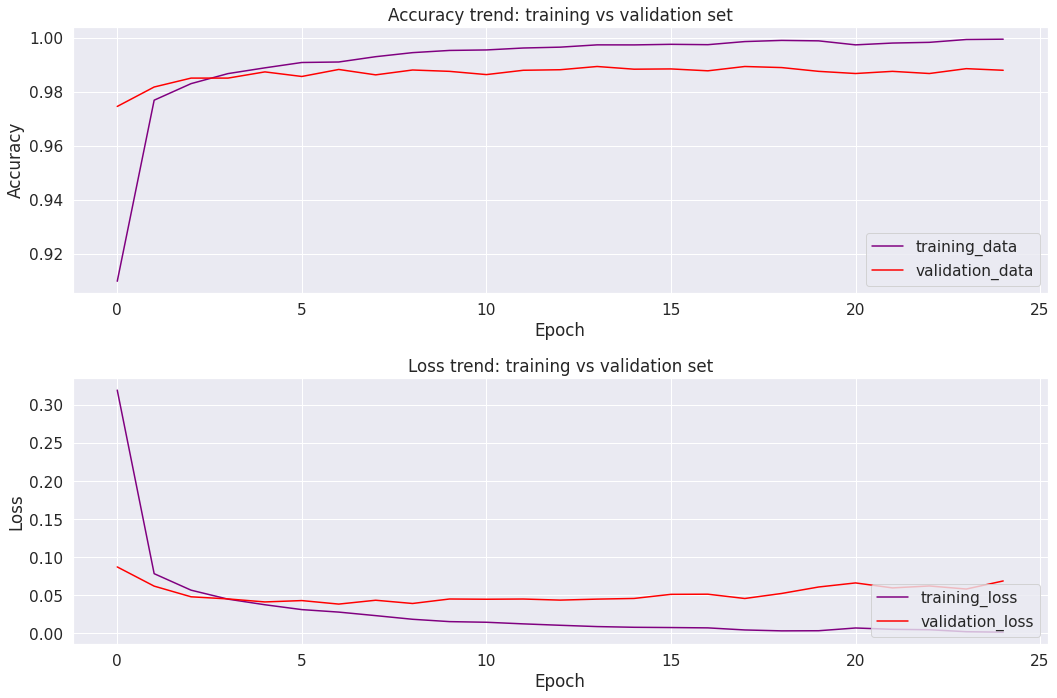

time: 1.01 s (started: 2021-09-11 16:25:46 +00:00)


In [34]:
# visualization of model accuracy trend across epochs
fig=plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(history.history["accuracy"],
         color='Purple')
plt.plot(history.history["val_accuracy"],
         color='Red')

plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training_data", "validation_data"], loc="lower right")
plt.title('Accuracy trend: training vs validation set')

# visualization of model loss across epochs
plt.subplot(2,1,2)
plt.plot(history.history["loss"],
         color='Purple')
plt.plot(history.history["val_loss"],
         color= 'Red')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend([ "training_loss", 
            "validation_loss"],
           loc="lower right")
plt.title('Loss trend: training vs validation set')
plt.tight_layout()
plt.show()

**OBSERVATIONS:** 

Plotting the accuracy values, the CNN seems to perform very well, both in the training and testing set. The second panel shows the loss values of the cross-entropy loss function. Here we can observe how the validation loss increases passing the training loss values.  This usually happens when the model performs extremely well on the training data but it does not do the same on the validation set: the model overfits the training data and it is not able to fully generalize.


**4.2 CNN: MODEL 1** 


Now we can explore different possibilities of building a CNN  by adding the padding or more layers and changing the kernel size


In [35]:
# model building with Keras API
model1 = Sequential()
model1.add(Conv2D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(28,28,1))) # change kernel size, add padding
model1.add(MaxPool2D(pool_size=2))
model1.add(Conv2D(filters=32, kernel_size=5, padding='same', activation='relu')) # change kernel size, add padding
model1.add(MaxPool2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))  #add one more Dense Layer
model1.add(Dense(10, activation='softmax'))
# model summary
#plot_model(model,show_shapes=True, show_layer_names=True)

# compile the model 
model1.compile(optimizer="adam",
               loss="categorical_crossentropy",
               metrics=["accuracy"])

# train the model
history1=model1.fit(xtrain,
                    ytrain,
                    validation_data=(xtest,ytest),
                    epochs=25,
                    batch_size=256)


Epoch 1/25
235/235 [==============================] - 6s 24ms/step - loss: 0.2594 - accuracy: 0.9235 - val_loss: 0.0580 - val_accuracy: 0.9821
Epoch 2/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0461 - val_accuracy: 0.9852
Epoch 3/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.0321 - val_accuracy: 0.9895
Epoch 4/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0315 - accuracy: 0.9904 - val_loss: 0.0313 - val_accuracy: 0.9890
Epoch 5/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0264 - accuracy: 0.9921 - val_loss: 0.0270 - val_accuracy: 0.9904
Epoch 6/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0274 - val_accuracy: 0.9916
Epoch 7/25
235/235 [==============================] - 5s 23ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0269 - val_accuracy: 0.9902

In [36]:
# performance on the validation set
score1=model1.evaluate(xtest,ytest)
cnn1_acc=round(score1[1],3)
cnn1_loss=round(score[0],3)
print(f'Test loss: {cnn1_loss}')
print(f'Test accuracy: {cnn1_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.0403 - accuracy: 0.9918
Test loss: 0.069
Test accuracy: 0.992
time: 2.62 s (started: 2021-09-11 16:28:01 +00:00)


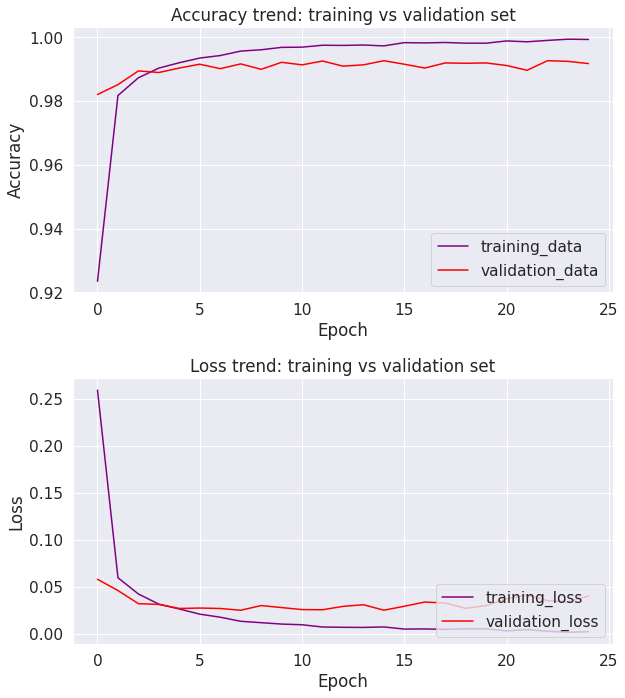

time: 865 ms (started: 2021-09-11 16:28:04 +00:00)


In [37]:
# visualization of model accuracy trend across epochs
fig=plt.figure(figsize=(9,10))
plt.subplot(2,1,1)
plt.plot(history1.history["accuracy"], color='Purple')
plt.plot(history1.history["val_accuracy"], color='Red')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training_data", "validation_data"], loc="lower right")
plt.title('Accuracy trend: training vs validation set')

# visualization of model loss trend across epochs
plt.subplot(2,1,2)
plt.plot(history1.history["loss"], color='Purple')
plt.plot(history1.history["val_loss"], color='Red')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend([ "training_loss", "validation_loss"], loc="lower right")
plt.title('Loss trend: training vs validation set')
plt.tight_layout()

plt.show()


**OBSERVATIONS:** 


Also in this case, the plots show that there is an increase of the loss on the validation set as the loss on the training set decreases (here the increase seems to be lower than in in Model 0. 

From the above results it seems quite clear that the performance of the CNN models 0 and 1 is improved with respect to the previous models, but the models architecture needs to be modified further to avoid overfitting and to obtain a more high-quality and general model.

**4.3 CNN: MODEL 2** 

We will build another CNN model changing its architecture to further inspect the model performance and possibly avoid the risk of overfitting. 

Beside the already used convolutional, pooling and dense layers, we can add the dropout layer which randomly sets input units to 0 toward a specific layer, with a frequency that is specified from the dropout rate parameter. This step introduces regularization and  helps in preventing overfitting. 






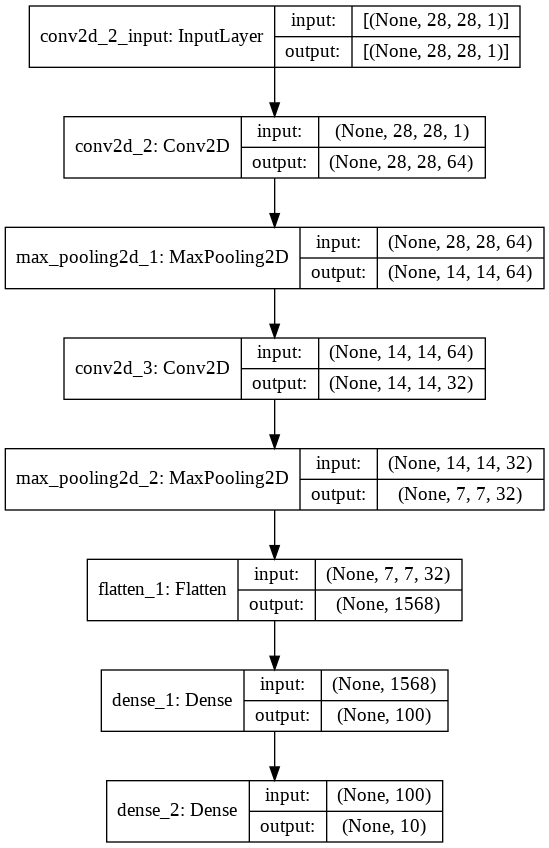

time: 257 ms (started: 2021-09-11 16:28:05 +00:00)


In [38]:
# model building with Keras API
model2 = Sequential()
model2.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(MaxPool2D(pool_size=2))
model2.add(Dropout(0.3))   # add Drouput layer
model2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPool2D(pool_size=2))
model2.add(Dropout(0.3))   # add Droupout layer
model2.add(Flatten())
model2.add(Dropout(0.5))   #add Dropout layer 
model2.add(Dense(10, activation='softmax'))

# model summary
from keras.utils.vis_utils import plot_model
plot_model(model1,
           show_shapes=True,
           show_layer_names=True)

In [39]:
# compiling 
model2.compile(optimizer="adam",
               loss="categorical_crossentropy", 
               metrics=["accuracy"])

time: 10.7 ms (started: 2021-09-11 16:28:05 +00:00)


In [40]:
# training 
epochs = 25
batch_size = 256

history2 = model2.fit(x=xtrain, 
                     y=ytrain, 
                    batch_size=batch_size, 
                    epochs=epochs,
                    validation_data=(xtest,ytest))

Epoch 1/25
235/235 [==============================] - 5s 19ms/step - loss: 0.5782 - accuracy: 0.8150 - val_loss: 0.1288 - val_accuracy: 0.9628
Epoch 2/25
235/235 [==============================] - 4s 18ms/step - loss: 0.1814 - accuracy: 0.9442 - val_loss: 0.0828 - val_accuracy: 0.9746
Epoch 3/25
235/235 [==============================] - 4s 18ms/step - loss: 0.1392 - accuracy: 0.9568 - val_loss: 0.0661 - val_accuracy: 0.9781
Epoch 4/25
235/235 [==============================] - 4s 18ms/step - loss: 0.1210 - accuracy: 0.9637 - val_loss: 0.0566 - val_accuracy: 0.9820
Epoch 5/25
235/235 [==============================] - 4s 18ms/step - loss: 0.1085 - accuracy: 0.9661 - val_loss: 0.0488 - val_accuracy: 0.9837
Epoch 6/25
235/235 [==============================] - 4s 18ms/step - loss: 0.0999 - accuracy: 0.9685 - val_loss: 0.0456 - val_accuracy: 0.9847
Epoch 7/25
235/235 [==============================] - 4s 18ms/step - loss: 0.0947 - accuracy: 0.9707 - val_loss: 0.0426 - val_accuracy: 0.9874

In [41]:
# performance on the validation set
score2=model2.evaluate(xtest,ytest)
cnn2_acc=round(score2[1],3)
cnn2_loss=round(score[0],3)
print(f'Test loss: {cnn2_acc}')
print(f'Test accuracy: {cnn2_loss}')


313/313 [==============================] - 1s 4ms/step - loss: 0.0258 - accuracy: 0.9910
Test loss: 0.991
Test accuracy: 0.069
time: 1.34 s (started: 2021-09-11 16:29:51 +00:00)


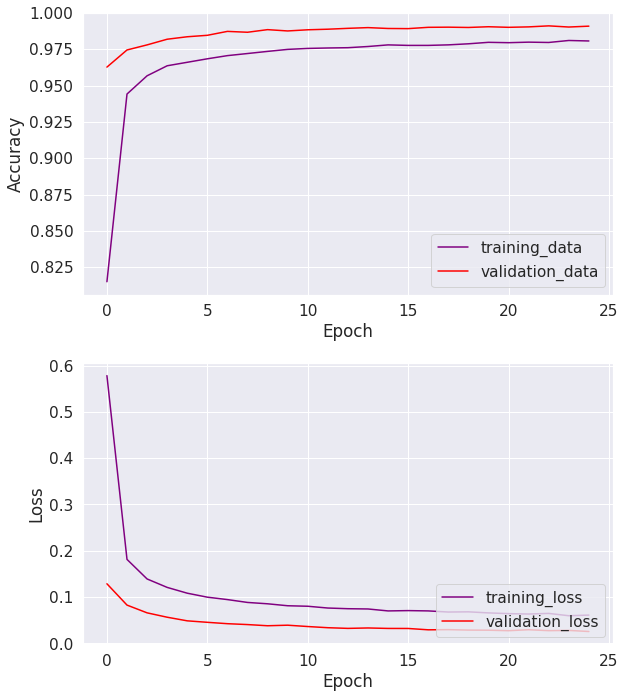

time: 815 ms (started: 2021-09-11 16:29:52 +00:00)


In [42]:
# visualization of model accuracy trend across epochs
fig=plt.figure(figsize=(9,10))
plt.subplot(2,1,1)
plt.plot(history2.history["accuracy"],
         color='Purple')
plt.plot(history2.history["val_accuracy"],
         color='Red')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["training_data", 
            "validation_data"], 
           loc="lower right")

# visualization of model loss trend across epochs
plt.subplot(2,1,2)
plt.plot(history2.history["loss"],
         color='Purple')
plt.plot(history2.history["val_loss"],
         color='Red')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend([ "training_loss", "validation_loss"],
           loc="lower right")
plt.tight_layout()
plt.show()

**OBSERVATIONS**

The last model shows a very high performance and low level of overfitting as well. The changes applied to the model have worked in regularizing the model and keeping a high level performance over all the previous trained models. 



**SUMMARY AND CONCLUSIONS** 

Here we will show a summary plot of the performances of all the models used in this project

In [44]:
models=['DT','DT_CV','RF','RF1','RF_CV','CNN0','CNN1','CNN2']
accuracies=[dt_acc,cv_acc_dt,rf_acc,rf_acc1,cv_acc_rf,cnn0_acc,cnn1_acc, cnn2_acc]

accuracy_df=pd.DataFrame(models, columns=['MODEL'])
accuracy_df['ACC_VALUE']=accuracies

accuracy_df

,MODEL,ACC_VALUE
0,DT,0.867
1,DT_CV,0.856
2,RF,0.970
3,RF1,0.971
4,RF_CV,0.968
5,CNN0,0.988
6,CNN1,0.992
7,CNN2,0.991


time: 22.4 ms (started: 2021-09-11 16:32:31 +00:00)


[]

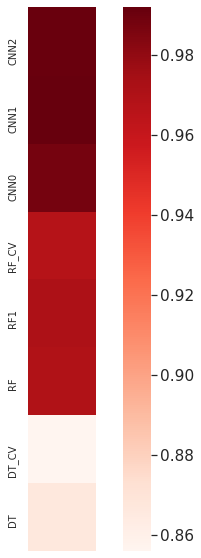

time: 344 ms (started: 2021-09-11 16:32:34 +00:00)


In [45]:
data1=np.asarray(accuracy_df['ACC_VALUE'])
fig,ax=plt.subplots(figsize=(10,10))
#sns.heatmap([data1])
from matplotlib import transforms
data2=data1.reshape(data1.shape[0],1)
sns.heatmap(data2,square=True, cmap='Reds')
ax.invert_yaxis()
ax.set_yticklabels(models, fontsize=10)
ax.set_xticklabels([])

In this project, we presented the MNIST DIGIT dataset and its composition. We then explored  different Machine Learning models for classification tasks, highlighting the main advantages and disadvantages. Each model has been assessed based on its ability to classify the written digits images of the MNIST dataset. The usage of the accuracy metric and of methods to measure overfitting, helped us to identify which model performs better.  Simple models not achieve a very high performance in terms of accuracy of the prediction w.r.t. the more complex ones as CNN.Overall, simple models as DT or ensemble models as RF do not overfit data, more complex model as CNN, outperforms simple models, but the definition of its arichtecture is important to avoid the risk of overfitting the data. 